# Import Libraries and Data Sets 

In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import KFold

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [115]:
train=pd.read_csv('D:\\Data Science\\Black-Friday-Sales-Prediction\\train.csv')
test=pd.read_csv('D:\\Data Science\\Black-Friday-Sales-Prediction\\test.csv')
sample_submission=pd.read_csv('D:\\Data Science\\Black-Friday-Sales-Prediction\\sample_submission.csv')

# Descriptive Analysis

In [116]:
train.shape

(550068, 12)

In [117]:
test.shape

(233599, 11)

In [118]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [119]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


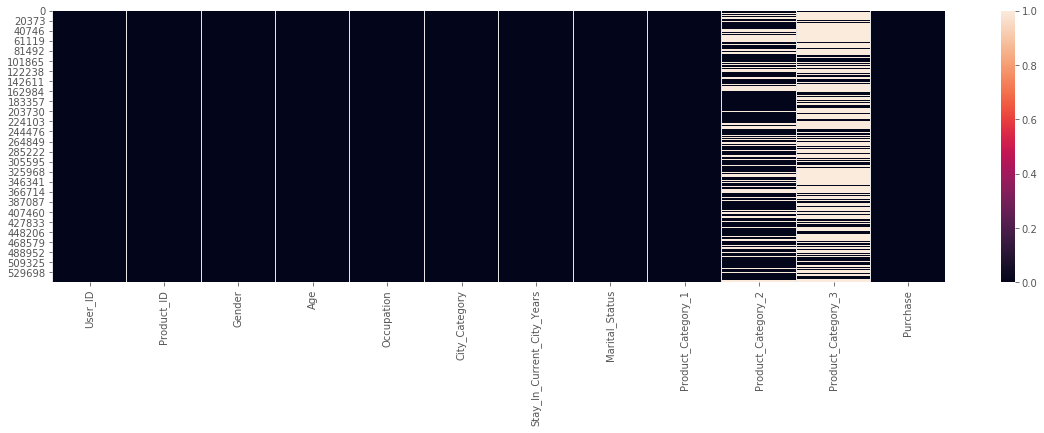

In [120]:
fig=plt.figure(figsize=(20,5))
sns.heatmap(train.isna())
plt.show()

In [121]:
print( 'NULL Values of Product_Category_2 from training data set '+str((train.Product_Category_2.isna().sum())*100/len(train))+' %' )
print( 'NULL Values of Product_Category_3 from training data set '+str((train.Product_Category_3.isna().sum())*100/len(train))+' %' )

NULL Values of Product_Category_2 from training data set 31.566642669633573 %
NULL Values of Product_Category_3 from training data set 69.67265865311198 %


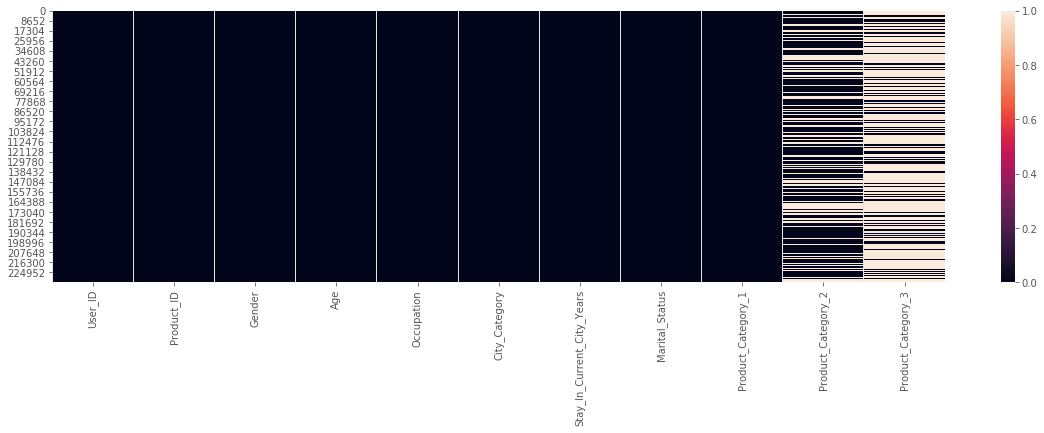

In [122]:
fig=plt.figure(figsize=(20,5))
sns.heatmap(test.isna())
plt.show()

In [123]:
print( 'NULL Values of Product_Category_2 from testing data set '
      +str((test.Product_Category_2.isna().sum())*100/len(test))+' %' )
print( 'NULL Values of Product_Category_3 from testing data set '
      +str((test.Product_Category_3.isna().sum())*100/len(test))+' %' )

NULL Values of Product_Category_2 from testing data set 30.96931065629562 %
NULL Values of Product_Category_3 from testing data set 69.59019516350669 %


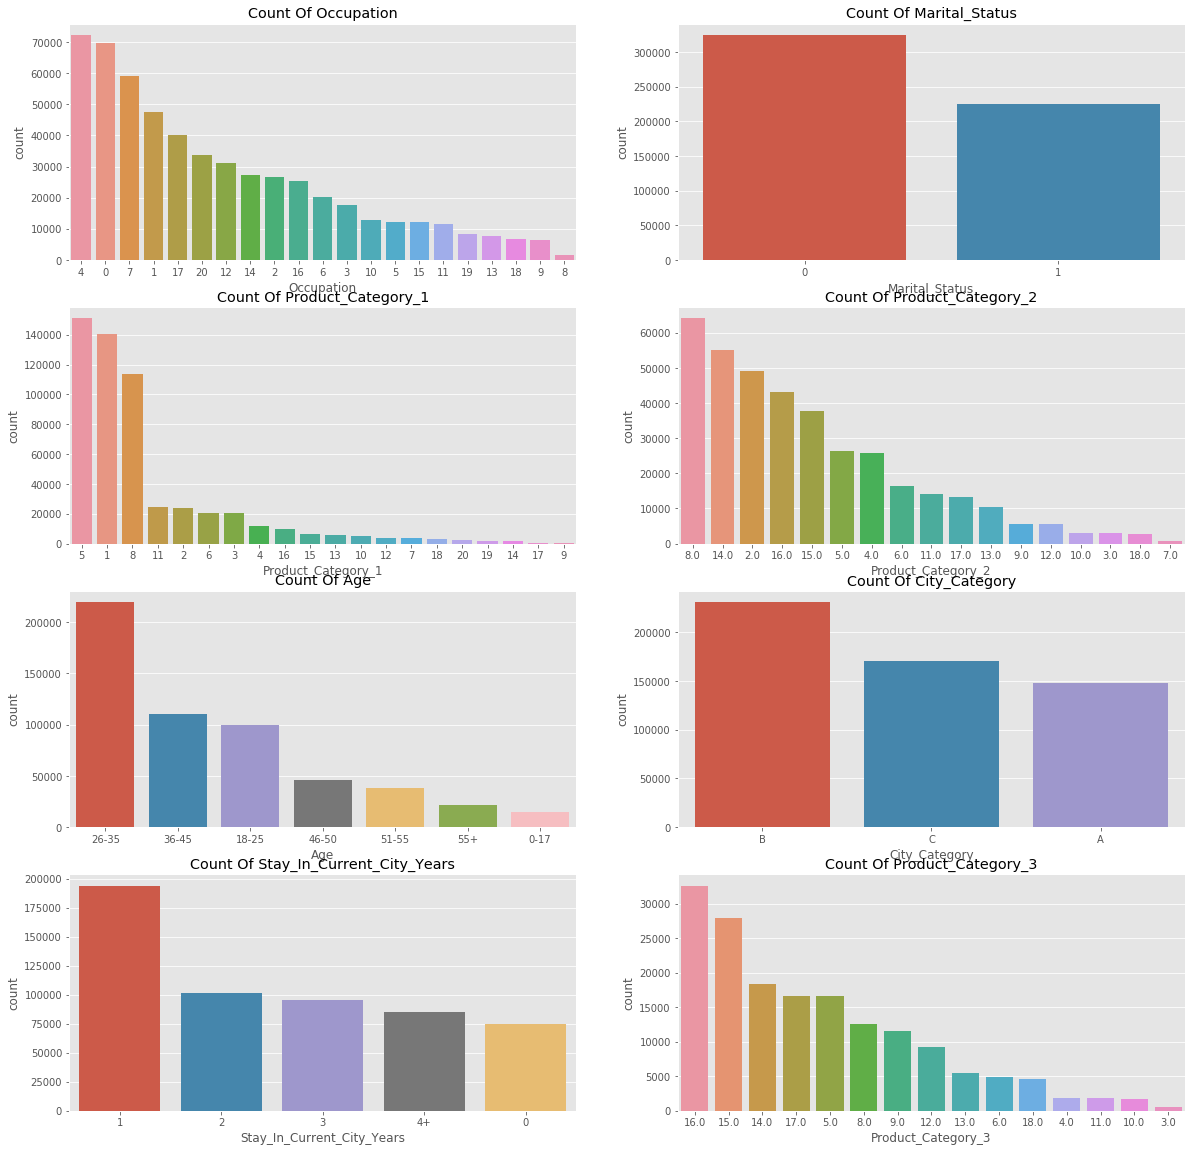

In [124]:
fig=plt.figure(figsize=(20,20))
j=1
for i in ['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Age',
          'City_Category','Stay_In_Current_City_Years','Product_Category_3']:
    plt.subplot(4,2,j)
    sns.countplot(train[i], order=train[i].value_counts().index)
    plt.title('Count Of '+i)
    j+=1
plt.show()

# Observations: 

# 1. Product_Category_3  has more than 50% NULL values needs to be                    deleted

# 2. Product_Category_2 has 30.9% NULL Values needs to be filled.

# 3. Product_Category_2 is in float type need to convert it into integer.

# 4. '+' needs to be replaced.

# 5. User_ID and Product_ID can be dropped.

# Exploratory Data Analysis

## Univariate Analysis

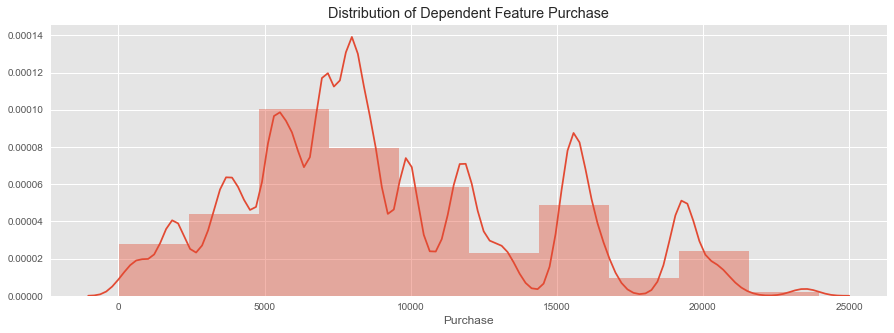

In [139]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(15,5))
plt.title('Distribution of Dependent Feature Purchase')
sns.distplot(train.Purchase,bins=10)
plt.show()

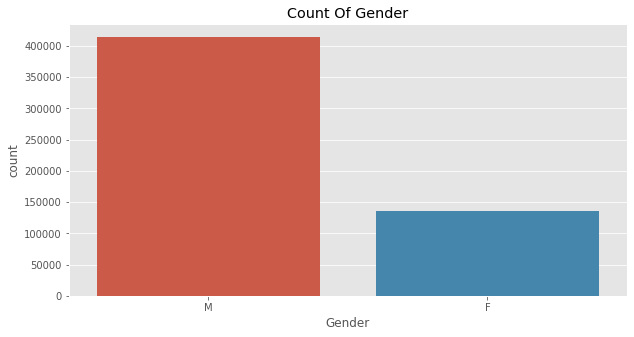

In [126]:
fig=plt.figure(figsize=(10,5))
sns.countplot(train.Gender,order=train.Gender.value_counts().index)
plt.title("Count Of Gender")
plt.show()

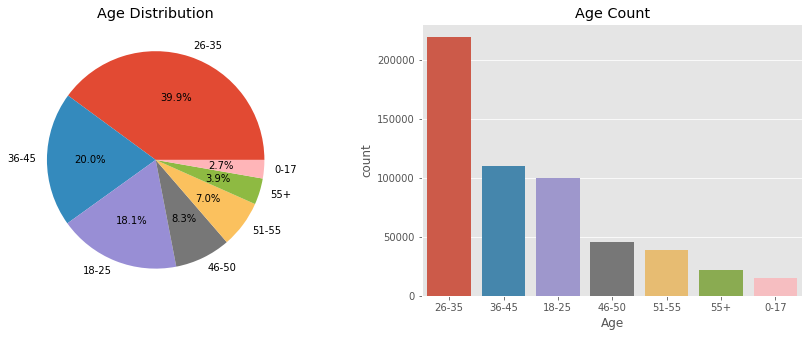

In [127]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(train.Age.value_counts(),labels=train.Age.value_counts().index,autopct='%1.1f%%')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.countplot(train.Age,order=train.Age.value_counts().index)
plt.title('Age Count')
plt.show()

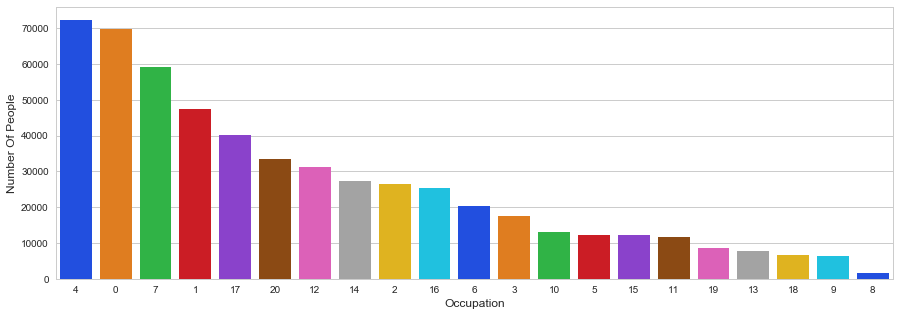

In [150]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,5))
sns.countplot(x=train.Occupation,order=train.Occupation.value_counts().index,palette = 'bright')
plt.ylabel('Number Of People')
plt.show()

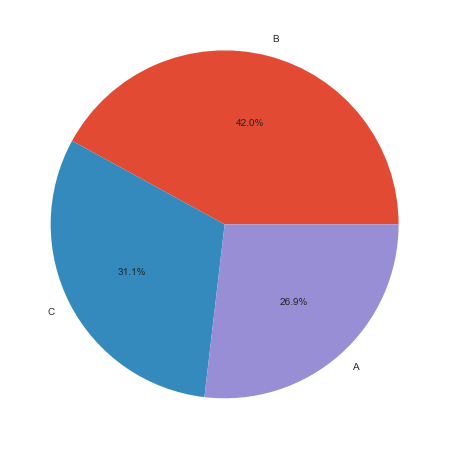

In [161]:
plt.figure(figsize=(8,8))
plt.pie(train.City_Category.value_counts(),labels=train.City_Category.value_counts().index,autopct='%1.1f%%')
plt.show()

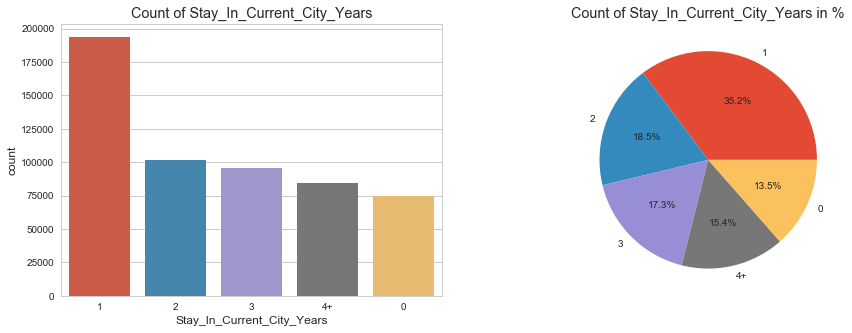

In [170]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Stay_In_Current_City_Years,order=train.Stay_In_Current_City_Years.value_counts().index)
plt.title('Count of Stay_In_Current_City_Years')
plt.subplot(1,2,2)
plt.pie(train.Stay_In_Current_City_Years.value_counts(),
        labels=train.Stay_In_Current_City_Years.value_counts().index,autopct='%1.1f%%')
plt.title('Count of Stay_In_Current_City_Years in %')
plt.show()